# ISPH Leadership Survey Analysis

This notebook performs a comprehensive analysis of the ISPH Leadership Survey data. The analysis includes:

*   **Data Loading and Preprocessing:** Loading the survey data and preparing it for analysis.
*   **Year Group Analysis:** Analyzing the distribution of students across different year groups.
*   **Response Analysis by Year Group:**  Calculating and exporting the percentage of responses for each question, grouped by year group.
*   **Response Analysis by Nationality:** Calculating and exporting the percentage of responses for each question, grouped by nationality.
*   **Response Analysis by Gender:** Calculating and exporting the percentage of responses for each question, grouped by gender.
*   **Overall Response Analysis:**  Calculating the overall percentage of responses for each question.
*   **Data Aggregation:** Combining the year group, nationality, and gender data into a single file for each question.
*   **Excel Formatting and Merging:** Creating a final merged Excel file with all questions, formatted for easy readability.

## 1. Import Libraries

We begin by importing the necessary Python libraries for data manipulation, visualization, and file I/O.

In [241]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import openpyxl

## 2. Load and Inspect Data

The survey data is loaded from a CSV file (`survey_data.csv`).  We examine the shape of the data (number of rows and columns) and display the first few rows to understand the data structure.

In [ ]:
# Load data from CSV
data = pd.read_csv('survey_data.csv')

# Print data shape
print(f'Data shape: {data.shape}')

# Display the first few rows
data.head()

Data shape: (130, 60)


,Timestamp,Please select your Year Group,Please choose your Nationality,Please select your gender,1,2,3,4,5,6,...,47,48,49,50,51,52,53,54,55,56
0,17/03/2025 08:14:20,Year 8,Korean,Female,3,3,3,3,2,2,...,2,2,2,3,2,3,3,3,4,3
1,17/03/2025 08:17:17,Year 8,Korean,Female,3,3,4,3,3,3,...,4,3,3,4,2,3,2,3,4,4
2,17/03/2025 08:18:23,Year 8,Korean,Female,3,3,3,1,3,4,...,3,2,3,1,3,4,1,1,4,4
3,17/03/2025 08:19:10,Year 8,Korean,Male,3,3,2,3,2,3,...,4,2,2,4,2,4,4,2,4,4
4,17/03/2025 08:20:02,Year 7,Korean,Male,4,3,2,3,4,4,...,3,2,1,4,3,4,4,4,4,4


## 3. Year Group Analysis

This section analyzes the distribution of students across different year groups. A bar plot visualizes the number of students in each year group, and the counts are printed.

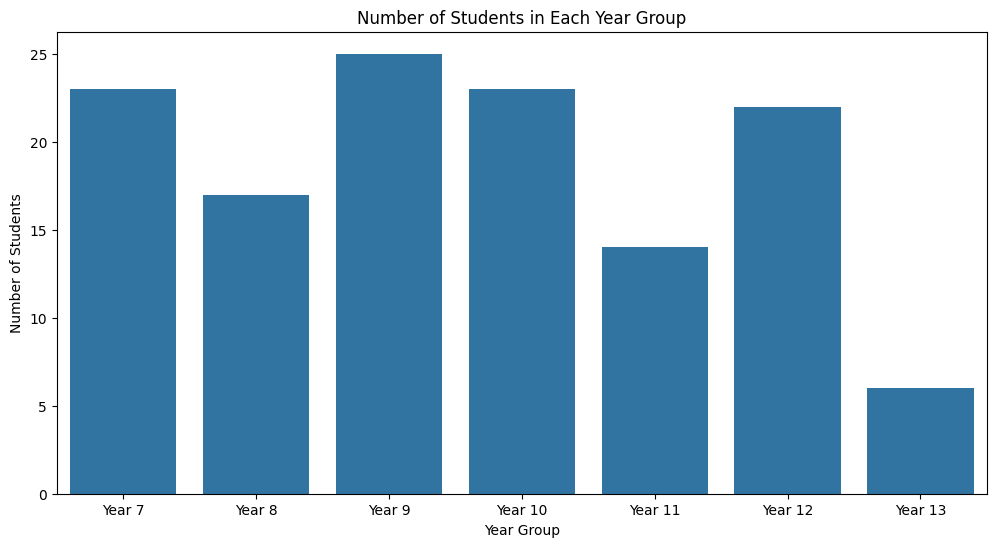

Year Group
Year 7     23
Year 8     17
Year 9     25
Year 10    23
Year 11    14
Year 12    22
Year 13     6
Name: count, dtype: int64


In [243]:
# Define sorted year groups
sorted_year_group = ['Year 7', 'Year 8', 'Year 9', 'Year 10', 'Year 11', 'Year 12', 'Year 13']

# Count students in each year group
year_group_count = data['Year Group'].value_counts().reindex(sorted_year_group)

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=year_group_count.index, y=year_group_count.values)
plt.title('Number of Students in Each Year Group')
plt.xlabel('Year Group')
plt.ylabel('Number of Students')
plt.show()

# Print year group counts
print(year_group_count)

In [244]:
# Correction for the  'Year 8'
# This correction should not be hardcoded - data must be fixed beforehand
year_group_count['Year 8'] = 16
year_group_count

Year Group
Year 7     23
Year 8     16
Year 9     25
Year 10    23
Year 11    14
Year 12    22
Year 13     6
Name: count, dtype: int64

## 4. Response Analysis by Year Group

This section analyzes the survey responses based on year groups. It calculates the percentage of each response (Strongly Disagree, Disagree, Agree, Strongly Agree) for each question, grouped by year group.  The results are exported to CSV files.

In [245]:
# Get question columns
questions = data.columns[4:]
responses = ['Strongly Disagree', 'Disagree', 'Agree', 'Strongly Agree']

# Initialize dictionaries to store counts and percentages
questions_dict = {}
questions_percentage = {}

for question in questions:
    questions_dict[question] = {}
    questions_percentage[question] = {}
    for year_group in sorted_year_group:
        questions_dict[question][year_group] = {response: 0 for response in responses}
        questions_percentage[question][year_group] = {response: 0 for response in responses}

# Populate the questions_dict with the actual counts
data_array = data.values

for response in data_array[1:]:
    student_info = response[:4]
    year_group = student_info[1]
    student_responses = response[4:]

    for i, question in enumerate(questions):
        word_response = responses[student_responses[i]-1]
        questions_dict[question][year_group][word_response] += 1

# Convert counts to percentages
for question in questions:
    for year_group in sorted_year_group:
        total = sum(questions_dict[question][year_group].values())
        for response in responses:
            questions_percentage[question][year_group][response] = round(questions_dict[question][year_group][response] / total * 100, 2)


# Create directory for year group CSVs
os.makedirs('csv_year', exist_ok=True)

# Export to CSV
for i, question in enumerate(questions):
    question_data = questions_percentage[question]
    question_df = pd.DataFrame(question_data).T
    question_df.to_csv(f'csv_year/Q{i+1}_percentage.csv')

#Display result of the first question:
questions_percentage[questions[0]]

{'Year 7': {'Strongly Disagree': 4.35,
  'Disagree': 17.39,
  'Agree': 60.87,
  'Strongly Agree': 17.39},
 'Year 8': {'Strongly Disagree': 12.5,
  'Disagree': 18.75,
  'Agree': 68.75,
  'Strongly Agree': 0.0},
 'Year 9': {'Strongly Disagree': 0.0,
  'Disagree': 12.0,
  'Agree': 76.0,
  'Strongly Agree': 12.0},
 'Year 10': {'Strongly Disagree': 0.0,
  'Disagree': 21.74,
  'Agree': 47.83,
  'Strongly Agree': 30.43},
 'Year 11': {'Strongly Disagree': 0.0,
  'Disagree': 14.29,
  'Agree': 35.71,
  'Strongly Agree': 50.0},
 'Year 12': {'Strongly Disagree': 0.0,
  'Disagree': 31.82,
  'Agree': 50.0,
  'Strongly Agree': 18.18},
 'Year 13': {'Strongly Disagree': 0.0,
  'Disagree': 0.0,
  'Agree': 66.67,
  'Strongly Agree': 33.33}}

## 5. Response Analysis by Nationality

This section analyzes survey responses based on nationality. It calculates the percentage of each response for each question, grouped by nationality.  The results are exported to CSV files.

In [246]:
# Get unique nationalities
nationalities = data['Nationality'].unique()

# Initialize dictionaries to store counts and percentages
questions_dict_nationality = {}
questions_percentage_nationality = {}

for question in questions:
    questions_dict_nationality[question] = {}
    questions_percentage_nationality[question] = {}
    for nationality in nationalities:
        questions_dict_nationality[question][nationality] = {response: 0 for response in responses}
        questions_percentage_nationality[question][nationality] = {response: 0 for response in responses}

# Populate the questions_dict_nationality with the actual counts
for response in data_array[1:]:
    student_info = response[:4]
    nationality = student_info[2]
    student_responses = response[4:]

    for i, question in enumerate(questions):
        word_response = responses[student_responses[i]-1]
        questions_dict_nationality[question][nationality][word_response] += 1

# Convert counts to percentages
for question in questions:
    for nationality in nationalities:
        total = sum(questions_dict_nationality[question][nationality].values())
        for response in responses:
            questions_percentage_nationality[question][nationality][response] = round(questions_dict_nationality[question][nationality][response] / total * 100, 2)

# Create directory for nationality CSVs
os.makedirs('csv_nationality', exist_ok=True)

# Export to CSV
for i, question in enumerate(questions):
    question_data = questions_percentage_nationality[question]
    question_df = pd.DataFrame(question_data).T
    question_df.to_csv(f'csv_nationality/Q{i+1}_percentage.csv')

#Display result of the first question:
questions_percentage_nationality[questions[0]]

{'Korean': {'Strongly Disagree': 1.56,
  'Disagree': 25.0,
  'Agree': 60.94,
  'Strongly Agree': 12.5},
 'Vietnamese': {'Strongly Disagree': 3.85,
  'Disagree': 9.62,
  'Agree': 57.69,
  'Strongly Agree': 28.85},
 'Japanese': {'Strongly Disagree': 0.0,
  'Disagree': 0.0,
  'Agree': 33.33,
  'Strongly Agree': 66.67},
 'English-Native Country(England, U.S.A etc)': {'Strongly Disagree': 0.0,
  'Disagree': 0.0,
  'Agree': 100.0,
  'Strongly Agree': 0.0},
 'Chinese': {'Strongly Disagree': 0.0,
  'Disagree': 0.0,
  'Agree': 100.0,
  'Strongly Agree': 0.0},
 'Chilean': {'Strongly Disagree': 0.0,
  'Disagree': 100.0,
  'Agree': 0.0,
  'Strongly Agree': 0.0},
 "Don't want to mention": {'Strongly Disagree': 0.0,
  'Disagree': 100.0,
  'Agree': 0.0,
  'Strongly Agree': 0.0}}

## 6. Response Analysis by Gender

This section analyzes survey responses based on gender. It calculates the percentage of each response for each question, grouped by gender.  The results are exported to CSV files.

In [247]:
# Get unique genders
genders = data['Gender'].unique()

# Initialize dictionaries to store counts and percentages
questions_dict_gender = {}
questions_percentage_gender = {}

for question in questions:
    questions_dict_gender[question] = {}
    questions_percentage_gender[question] = {}
    for gender in genders:
        questions_dict_gender[question][gender] = {response: 0 for response in responses}
        questions_percentage_gender[question][gender] = {response: 0 for response in responses}

# Populate the questions_dict_gender with the actual counts
for response in data_array[1:]:
    student_info = response[:4]
    gender = student_info[3]
    student_responses = response[4:]

    for i, question in enumerate(questions):
        word_response = responses[student_responses[i]-1]
        questions_dict_gender[question][gender][word_response] += 1

# Convert counts to percentages
for question in questions:
    for gender in genders:
        total = sum(questions_dict_gender[question][gender].values())
        for response in responses:
            questions_percentage_gender[question][gender][response] = round(questions_dict_gender[question][gender][response] / total * 100, 2)

# Create directory for gender CSVs
os.makedirs('csv_gender', exist_ok=True)

# Export to CSV
for i, question in enumerate(questions):
    question_data = questions_percentage_gender[question]
    question_df = pd.DataFrame(question_data).T
    question_df.to_csv(f'csv_gender/Q{i+1}_percentage.csv')

#Display result of the first question:
questions_percentage_gender[questions[0]]

{'Female': {'Strongly Disagree': 2.82,
  'Disagree': 22.54,
  'Agree': 60.56,
  'Strongly Agree': 14.08},
 'Male': {'Strongly Disagree': 1.72,
  'Disagree': 13.79,
  'Agree': 55.17,
  'Strongly Agree': 29.31}}

## 7. Overall Response Analysis

This section calculates the overall percentage of each response for each question, combining data from all year groups, nationalities, and genders. The results are exported to an Excel file.

In [248]:
# Initialize dictionary for overall percentages
questions_percentage_all = {}

for question in questions:
    questions_percentage_all[question] = {response: 0 for response in responses}

# Calculate overall percentages
for i, question in enumerate(questions):
    for response in responses:
        total = 0
        for year_group in sorted_year_group:
            total += questions_dict[question][year_group][response]
        questions_percentage_all[question][response] = round(total / len(data) * 100, 2)

# Create a DataFrame
questions_percentage_all_df = pd.DataFrame(questions_percentage_all).T
questions_percentage_all_df.index.name = 'Question'

# Export to Excel
questions_percentage_all_df.to_excel('percentage_all.xlsx')

#Display result of the first question:
questions_percentage_all[questions[0]]

{'Strongly Disagree': 2.31,
 'Disagree': 18.46,
 'Agree': 57.69,
 'Strongly Agree': 20.77}

## 8. Data Aggregation

This section aggregates the year group, nationality, and gender data into a single file for each question.  A total statistics row is also added, and the results are exported to both CSV and Excel formats.

In [249]:
# Create necessary directories
os.makedirs('all_data_csv', exist_ok=True)
os.makedirs('all_data_xls', exist_ok=True)

# List files in csv_year directory
files = os.listdir('csv_year')

# Function to extract question number from filename
def extract_number(filename):
    match = re.search(r'Q(\d+)', filename)
    return int(match.group(1)) if match else float('inf')

# Sort files numerically by question number
sorted_csv = sorted(files, key=extract_number)

# Iterate through sorted files
for index, file in enumerate(sorted_csv):
    gender_file = f'csv_gender/{file}'
    nationality_file = f'csv_nationality/{file}'
    year_file = f'csv_year/{file}'

    # Read data from CSVs
    gender_data = pd.read_csv(gender_file)
    nationality_data = pd.read_csv(nationality_file)
    year_data = pd.read_csv(year_file)

    # Rename the first column to 'Category'
    gender_data.rename(columns={'Unnamed: 0': 'Category'}, inplace=True)
    nationality_data.rename(columns={'Unnamed: 0': 'Category'}, inplace=True)
    year_data.rename(columns={'Unnamed: 0': 'Category'}, inplace=True)

    # Add a row of NaNs to separate the tables
    separator = pd.DataFrame([[''] * gender_data.shape[1]], columns=gender_data.columns)

    # Concatenate the dataframes with separators
    all_data = pd.concat([gender_data, separator, nationality_data, separator, year_data], ignore_index=True)

    # Get total stats for the question
    total_stats = questions_percentage_all[questions[index]]
    total_stats_row = pd.DataFrame([total_stats], columns=all_data.columns)
    total_stats_row['Category'] = 'Total Stats'

    # Add the total stats row to the concatenated data
    all_data = pd.concat([all_data, separator, total_stats_row], ignore_index=True)

    # Export the concatenated data to CSV and Excel
    all_data.to_csv(f'all_data_csv/{file}', index=False)
    all_data.to_excel(f'all_data_xls/{file.replace(".csv", ".xlsx")}', index=False)

## 9. Excel Formatting and Merging

This section formats the individual Excel files by adding the question text as the first row and merging the first few columns. It then merges all individual Excel files into a single comprehensive Excel file, with each question's data on a separate sheet.

In [250]:
# List files in all_data_xls directory
all_xls = os.listdir('all_data_xls')

# Function to extract question number from filename
def extract_number(filename):
    match = re.search(r'Q(\d+)', filename)
    return int(match.group(1)) if match else float('inf')

# Sort files numerically by question number
sorted_xls = sorted(all_xls, key=extract_number)

# Add question text to each Excel file
for index, file in enumerate(sorted_xls):
    question = questions[index]

    # Load the existing workbook
    wb = openpyxl.load_workbook(f'all_data_xls/{file.replace(".csv", ".xlsx")}')
    ws = wb.active  # Get the first sheet

    # Insert the question at row 0 (first row)
    ws.insert_rows(1)  # Push existing data down
    ws.cell(row=1, column=1, value=question)  # Set the question in the first cell

    # Merge the first 5 columns for that row (A1:E1)
    ws.merge_cells(start_row=1, start_column=1, end_row=1, end_column=5)

    # Save the updated file
    wb.save(f'all_data_xls/{file.replace(".csv", ".xlsx")}')

# Merge all Excel files into a single workbook
wb = openpyxl.Workbook()
default_sheet = wb.active
wb.remove(default_sheet)  # Remove the default sheet

for idx, file in enumerate(sorted_xls):
    if not file.endswith('.xlsx'):
        continue  # Skip non-Excel files

    file_path = os.path.join('all_data_xls', file)

    # Extract question number (e.g., 'Q47' from 'Q47_percentage.xlsx')
    sheet_name = file.split('_')[0]  # Extracts 'Q47'

    # Load the individual Excel file
    wb_temp = openpyxl.load_workbook(file_path)
    ws_temp = wb_temp.active  # Get first sheet of the source file

    # Create a new sheet with the question number as the name
    ws = wb.create_sheet(title=sheet_name)

    # Copy data from the individual sheet
    for row in ws_temp.iter_rows(values_only=True):
        ws.append(row)

# Save the merged Excel file
merged_file = "merged_questions.xlsx"
wb.save(merged_file)
print(f"Merged Excel saved as {merged_file}")

Merged Excel saved as merged_questions.xlsx
